In [1]:
import numpy as np
import matplotlib.pyplot as plt
import FiberNuller
from hcipy import *

In [2]:
grid_size = 200
pupil_grid = make_pupil_grid(grid_size)
circ = circular_aperture(diameter=1)
aperture = circ(pupil_grid)

0.8140851063288669


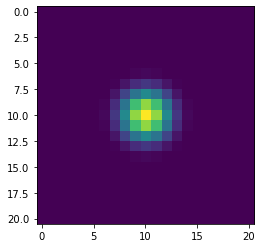

In [13]:
#Regular fiber coupling using the generic fiber nuller class without a phase screen
phase_screen = np.zeros(pupil_grid.shape).ravel()

tt_x=0
tt_y=0
wf = Wavefront(aperture*np.exp(1j*2*np.pi*(tt_x)*pupil_grid.x)*np.exp(1j*2*np.pi*(tt_y)*pupil_grid.y))
wf.total_power = 1

fn = FiberNuller.FiberNuller(pupil_grid,1.4,1,1,1,phase_screen)
output = fn.forward(wf)
print(np.square(np.abs(output)))

#coupling donut
xs = np.linspace(-3,3,21)
ys = np.linspace(-3,3,21)

donut = np.zeros((len(xs),len(ys)))
for i,xi in enumerate(xs):
    for j,yj in enumerate(ys):
        wf = Wavefront(aperture*np.exp(1j*2*np.pi*(xi)*pupil_grid.x)*np.exp(1j*2*np.pi*(yj)*pupil_grid.y))
        wf.total_power = 1
        donut[i,j] = np.square(np.abs(fn.forward(wf)))
        
plt.figure()
plt.imshow(donut)

0.1924260441676615
0.10161006891863733


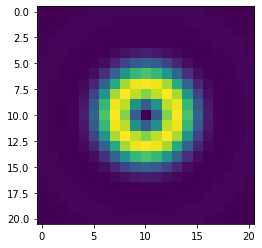

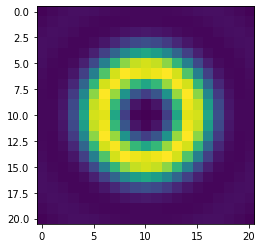

In [15]:
#Simulating a Charge 1 Vortex
tt_x=0.85
tt_y=0
wf = Wavefront(aperture*np.exp(1j*2*np.pi*(tt_x)*pupil_grid.x)*np.exp(1j*2*np.pi*(tt_y)*pupil_grid.y))
wf.total_power = 1
vfn_c1 = FiberNuller.VortexFiberNuller(pupil_grid,1.4,1,1,1,1)

output = vfn_c1.forward(wf)
print(np.square(np.abs(output)))

#coupling donut
xs = np.linspace(-3,3,21)
ys = np.linspace(-3,3,21)

donut = np.zeros((len(xs),len(ys)))
for i,xi in enumerate(xs):
    for j,yj in enumerate(ys):
        wf = Wavefront(aperture*np.exp(1j*2*np.pi*(xi)*pupil_grid.x)*np.exp(1j*2*np.pi*(yj)*pupil_grid.y))
        wf.total_power = 1
        donut[i,j] = np.square(np.abs(vfn_c1.forward(wf)))
        
plt.figure()
plt.imshow(donut)

#Simulating a Charge 2 Vortex
tt_x=1.3
tt_y=0
wf = Wavefront(aperture*np.exp(1j*2*np.pi*(tt_x)*pupil_grid.x)*np.exp(1j*2*np.pi*(tt_y)*pupil_grid.y))
wf.total_power = 1
vfn_c2 = FiberNuller.VortexFiberNuller(pupil_grid,1.3,1,1,1,2)

output = vfn_c2.forward(wf)
print(np.square(np.abs(output)))

#coupling donut
xs = np.linspace(-3,3,21)
ys = np.linspace(-3,3,21)

donut = np.zeros((len(xs),len(ys)))
for i,xi in enumerate(xs):
    for j,yj in enumerate(ys):
        wf = Wavefront(aperture*np.exp(1j*2*np.pi*(xi)*pupil_grid.x)*np.exp(1j*2*np.pi*(yj)*pupil_grid.y))
        wf.total_power = 1
        donut[i,j] = np.square(np.abs(vfn_c2.forward(wf)))
        
plt.figure()
plt.imshow(donut)

[1.36365719e-01 4.20861890e-01 5.98398026e-12 8.55869532e-10
 1.96233198e-01 1.76389295e-02]


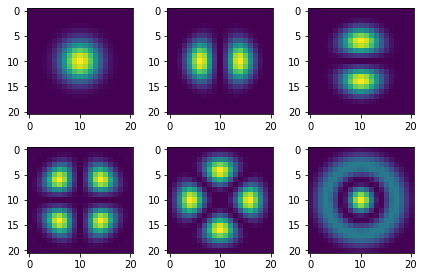

In [22]:
#Simulate a PLN (no vortex)
tt_x=0
tt_y=1
wf = Wavefront(aperture*np.exp(1j*2*np.pi*(tt_x)*pupil_grid.x)*np.exp(1j*2*np.pi*(tt_y)*pupil_grid.y))
wf.total_power = 1
pln = FiberNuller.PhotonicLanternNuller(pupil_grid,1.31,1,1,1,None)

output = pln.forward(wf)
print(np.square(np.abs(output)))

#coupling donut
xs = np.linspace(-2.2,2.2,21)
ys = np.linspace(-2.2,2.2,21)

donut = np.zeros((len(xs),len(ys),6))
for i,xi in enumerate(xs):
    for j,yj in enumerate(ys):
        wf = Wavefront(aperture*np.exp(1j*2*np.pi*(xi)*pupil_grid.x)*np.exp(1j*2*np.pi*(yj)*pupil_grid.y))
        wf.total_power = 1
        donut[i,j] = np.square(np.abs(pln.forward(wf)))

plt.figure()
for n in range(6):
    plt.subplot(2,3,n+1)
    plt.imshow(donut[:,:,n])
plt.tight_layout()

2.8139403206646775e-20
0.35710004481140084


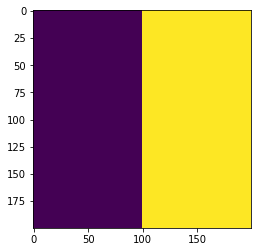

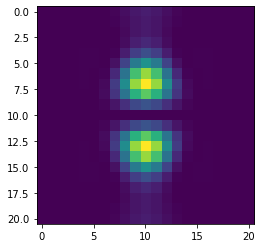

In [35]:
#Demonstration of phase knife nuller using generic fiber nuller class with a custom phase screen
phase_screen = np.zeros(pupil_grid.shape)
middle_idx = int(phase_screen.shape[0]/2)
phase_screen[:,middle_idx:] = np.pi

plt.figure()
plt.imshow(phase_screen)

phase_screen = phase_screen.ravel()

tt_x=0
tt_y=0
wf = Wavefront(aperture*np.exp(1j*2*np.pi*(tt_x)*pupil_grid.x)*np.exp(1j*2*np.pi*(tt_y)*pupil_grid.y))
wf.total_power = 1

fn = FiberNuller.FiberNuller(pupil_grid,1.4,1,1,1,phase_screen) #not sure if optimal MFD?
output = fn.forward(wf)
print(np.square(np.abs(output)))

#coupling donut
xs = np.linspace(-3,3,21)
ys = np.linspace(-3,3,21)

donut = np.zeros((len(xs),len(ys)))
for i,xi in enumerate(xs):
    for j,yj in enumerate(ys):
        wf = Wavefront(aperture*np.exp(1j*2*np.pi*(xi)*pupil_grid.x)*np.exp(1j*2*np.pi*(yj)*pupil_grid.y))
        wf.total_power = 1
        donut[i,j] = np.square(np.abs(fn.forward(wf)))
        
plt.figure()
plt.imshow(donut)

print(np.max(donut))